In [ ]:
pip install fitter

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import datetime
from fitter import Fitter, get_common_distributions, get_distributions
plt.style.use('ggplot')

Visualize for national data

In [2]:
df_nation = pd.read_csv('./data/nation.csv')

In [3]:
df_nation.head()

,Unnamed: 0,total,out_quarantine_area,in_quarantine_area,onceInjected,twiceInjected,recovered_by_day,death_by_day,Date
0,01/12/2020,5,0.0,0.0,0.0,0.0,16.0,0,2020-12-01
1,02/12/2020,7,0.0,0.0,0.0,0.0,6.0,0,2020-12-02
2,03/12/2020,3,0.0,0.0,0.0,0.0,8.0,0,2020-12-03
3,04/12/2020,0,0.0,0.0,0.0,0.0,11.0,0,2020-12-04
4,05/12/2020,4,0.0,0.0,0.0,0.0,0.0,0,2020-12-05


In [4]:
df_nation['Date'] = pd.to_datetime(df_nation['Date'], format = '%Y-%m-%d')

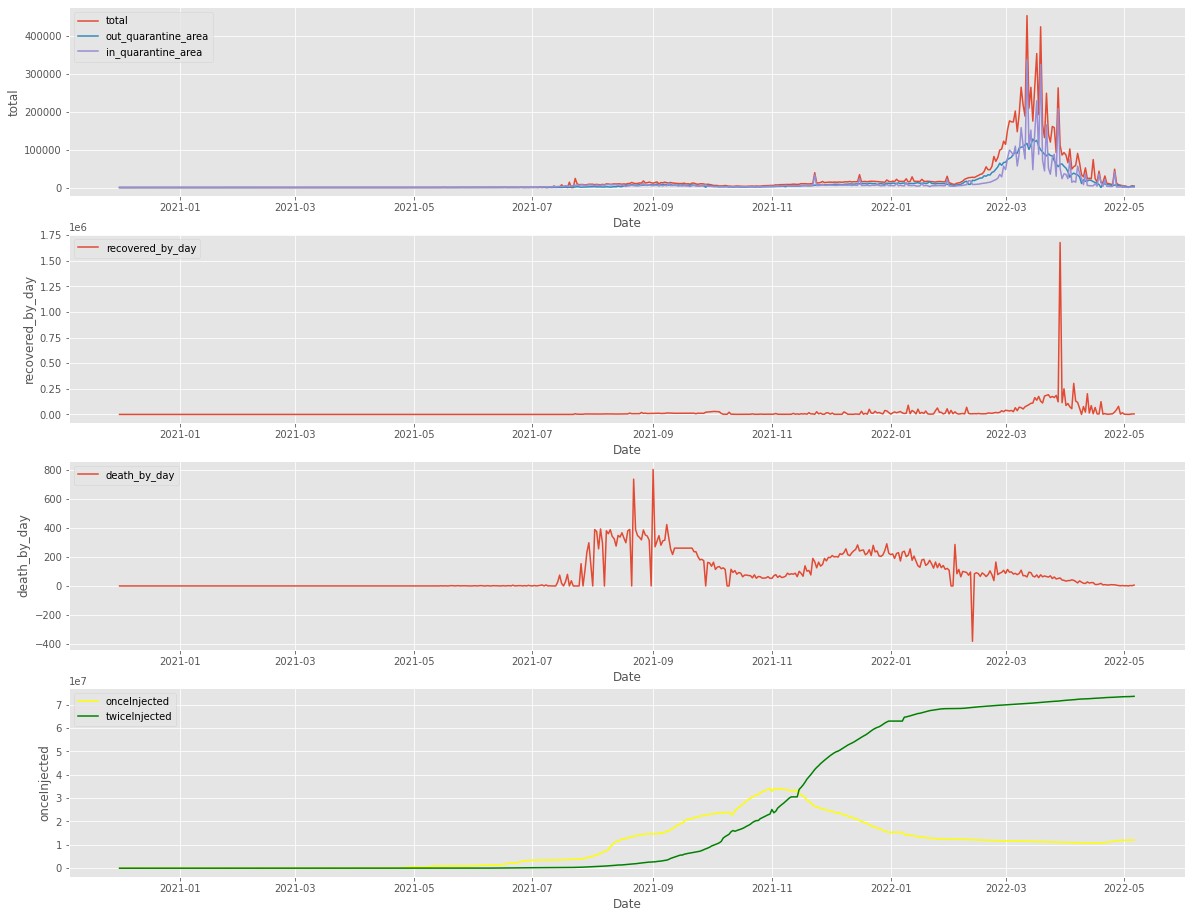

In [5]:
fig_dims = (20, 16)
fig, (ax,ax1,ax2,ax3) = plt.subplots(nrows=4,ncols=1,figsize=fig_dims)
ax = sns.lineplot(x='Date', y='total', data=df_nation, ax = ax, label='total')
ax = sns.lineplot(x='Date', y='out_quarantine_area', data=df_nation, ax = ax, label='out_quarantine_area')
ax = sns.lineplot(x='Date', y='in_quarantine_area', data=df_nation, ax = ax, label='in_quarantine_area')
ax1 = sns.lineplot(x='Date', y='recovered_by_day', data=df_nation, ax = ax1, label='recovered_by_day')
ax2 = sns.lineplot(x='Date', y='death_by_day', data=df_nation, ax = ax2, label='death_by_day')
ax3 = sns.lineplot(x='Date', y='onceInjected', data=df_nation, ax = ax3, label='onceInjected', color='yellow')
ax3 = sns.lineplot(x='Date', y='twiceInjected', data=df_nation, ax = ax3, label='twiceInjected', color='green')
ax.legend(loc="upper left")
ax1.legend(loc="upper left")
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

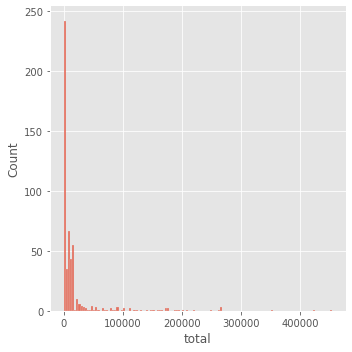

In [19]:
sns.displot(data=df_nation, x="total", kind="hist")

,sumsquare_error,aic,bic,kl_div
beta,1.436274e-09,7415.603998,-13870.025253,inf
gamma,5.283797e-09,2935.601986,-13196.329603,inf
burr,8.394421e-09,3093.876053,-12948.426468,inf
lognorm,9.269215e-09,3052.674752,-12902.937539,inf
norm,1.187312e-08,4599.001437,-12779.959340,inf


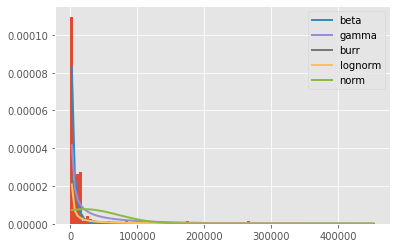

In [20]:
f = Fitter(df_nation['total'].values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [18]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.3547314395111723,
  'b': 386.6147663083551,
  'loc': -9.809504479431209e-24,
  'scale': 3642611.998527404}}

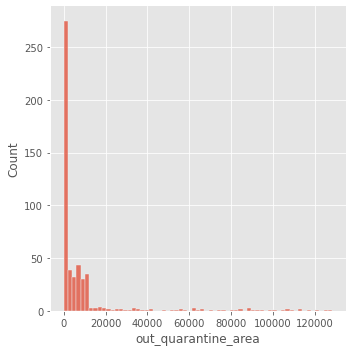

In [21]:
sns.displot(data=df_nation, x='out_quarantine_area', kind="hist")

,sumsquare_error,aic,bic,kl_div
beta,2.062086e-08,4518.607371,-12479.286288,inf
gamma,8.287262e-08,2529.819142,-11759.441169,inf
lognorm,8.478590e-08,2855.232731,-11747.526771,inf
burr,1.156355e-07,2823.904974,-11579.285265,inf
norm,1.334681e-07,3034.685699,-11516.935657,inf


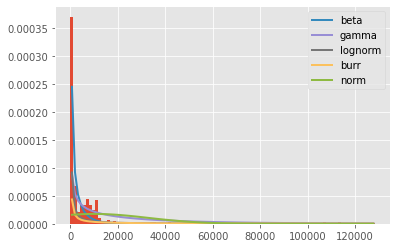

In [22]:
f = Fitter(df_nation['out_quarantine_area'].values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [23]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.31285670553604694,
  'b': 249.36643219893332,
  'loc': -1.1311435306708383e-25,
  'scale': 1441327.2481527291}}

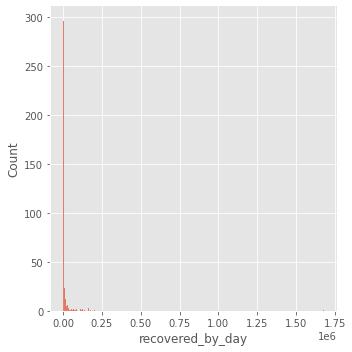

In [24]:
sns.displot(data=df_nation, x='recovered_by_day', kind="hist")

,sumsquare_error,aic,bic,kl_div
beta,3.213653e-10,1.749315e+04,-14651.578897,inf
burr,1.850290e-09,3.393868e+03,-13737.807853,inf
lognorm,1.894421e-09,3.390442e+03,-13731.761492,inf
norm,2.041279e-09,1.623701e+04,-13699.044913,inf
gamma,2.469289e-09,5.772695e+07,-13593.422727,NaN


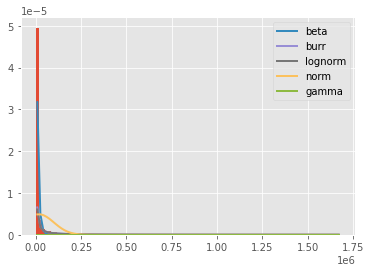

In [25]:
f = Fitter(df_nation['recovered_by_day'].values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [26]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 0.5912807313077434,
  'b': 671.3134401330581,
  'loc': -3.7351106873022415e-26,
  'scale': 7985071.9574811105}}

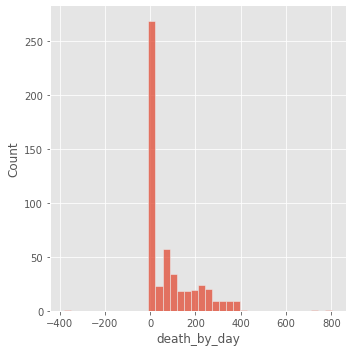

In [27]:
sns.displot(data=df_nation, x='death_by_day', kind="hist")

,sumsquare_error,aic,bic,kl_div
beta,0.001560,2125.159561,-6615.043154,inf
norm,0.001585,2134.487285,-6619.296974,inf
lognorm,0.001631,1776.067143,-6598.160903,inf
gamma,0.001814,38317.853019,-6542.832084,inf
burr,0.001996,1798.249080,-6486.627073,inf


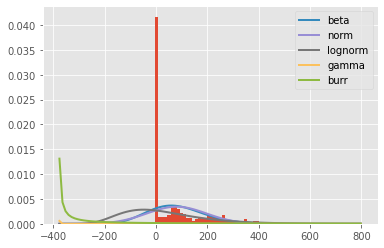

In [28]:
f = Fitter(df_nation['death_by_day'].values,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [29]:
f.get_best(method = 'sumsquare_error')

{'beta': {'a': 26.464779685759467,
  'b': 24947.61830853948,
  'loc': -487.1247716474079,
  'scale': 536058.5189118959}}

3 period

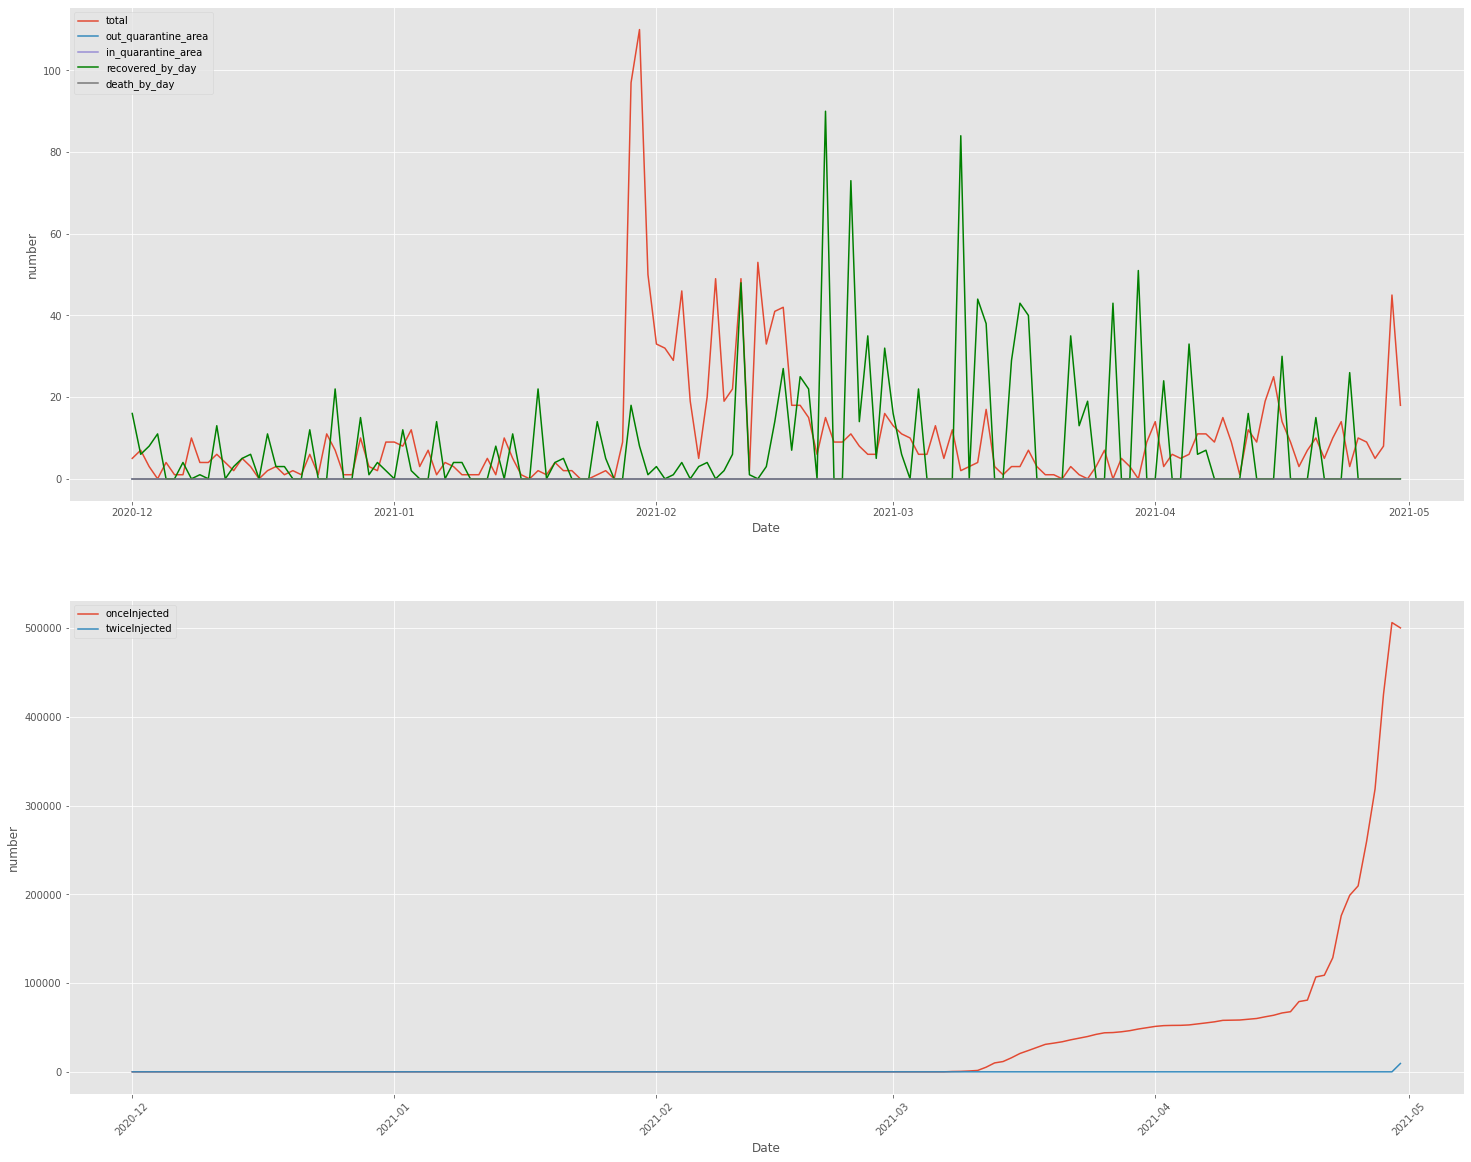

In [114]:
fig_dims = (25, 20)
fig, (ax,ax2) = plt.subplots(nrows=2,ncols=1,figsize=fig_dims)
indices1 = df_nation['Date'] < datetime.datetime(2021, 5, 1)
ax = sns.lineplot(x='Date', y='total', data=df_nation.loc[indices1], ax = ax, label='total')
ax = sns.lineplot(x='Date', y='out_quarantine_area', data=df_nation.loc[indices1], ax = ax, label='out_quarantine_area')
ax = sns.lineplot(x='Date', y='in_quarantine_area', data=df_nation.loc[indices1], ax = ax, label='in_quarantine_area')
ax = sns.lineplot(x='Date', y='recovered_by_day', data=df_nation.loc[indices1], ax = ax, label='recovered_by_day', color='green')
ax = sns.lineplot(x='Date', y='death_by_day', data=df_nation.loc[indices1], ax = ax, label='death_by_day')
plt.xticks(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel('number')
ax2 = sns.lineplot(x='Date', y='onceInjected', data=df_nation.loc[indices1], ax = ax2, label='onceInjected')
ax2 = sns.lineplot(x='Date', y='twiceInjected', data=df_nation.loc[indices1], ax = ax2, label='twiceInjected')
ax2.legend(loc="upper left")
ax2.set_ylabel('number')
plt.xticks(rotation=45)
plt.show()

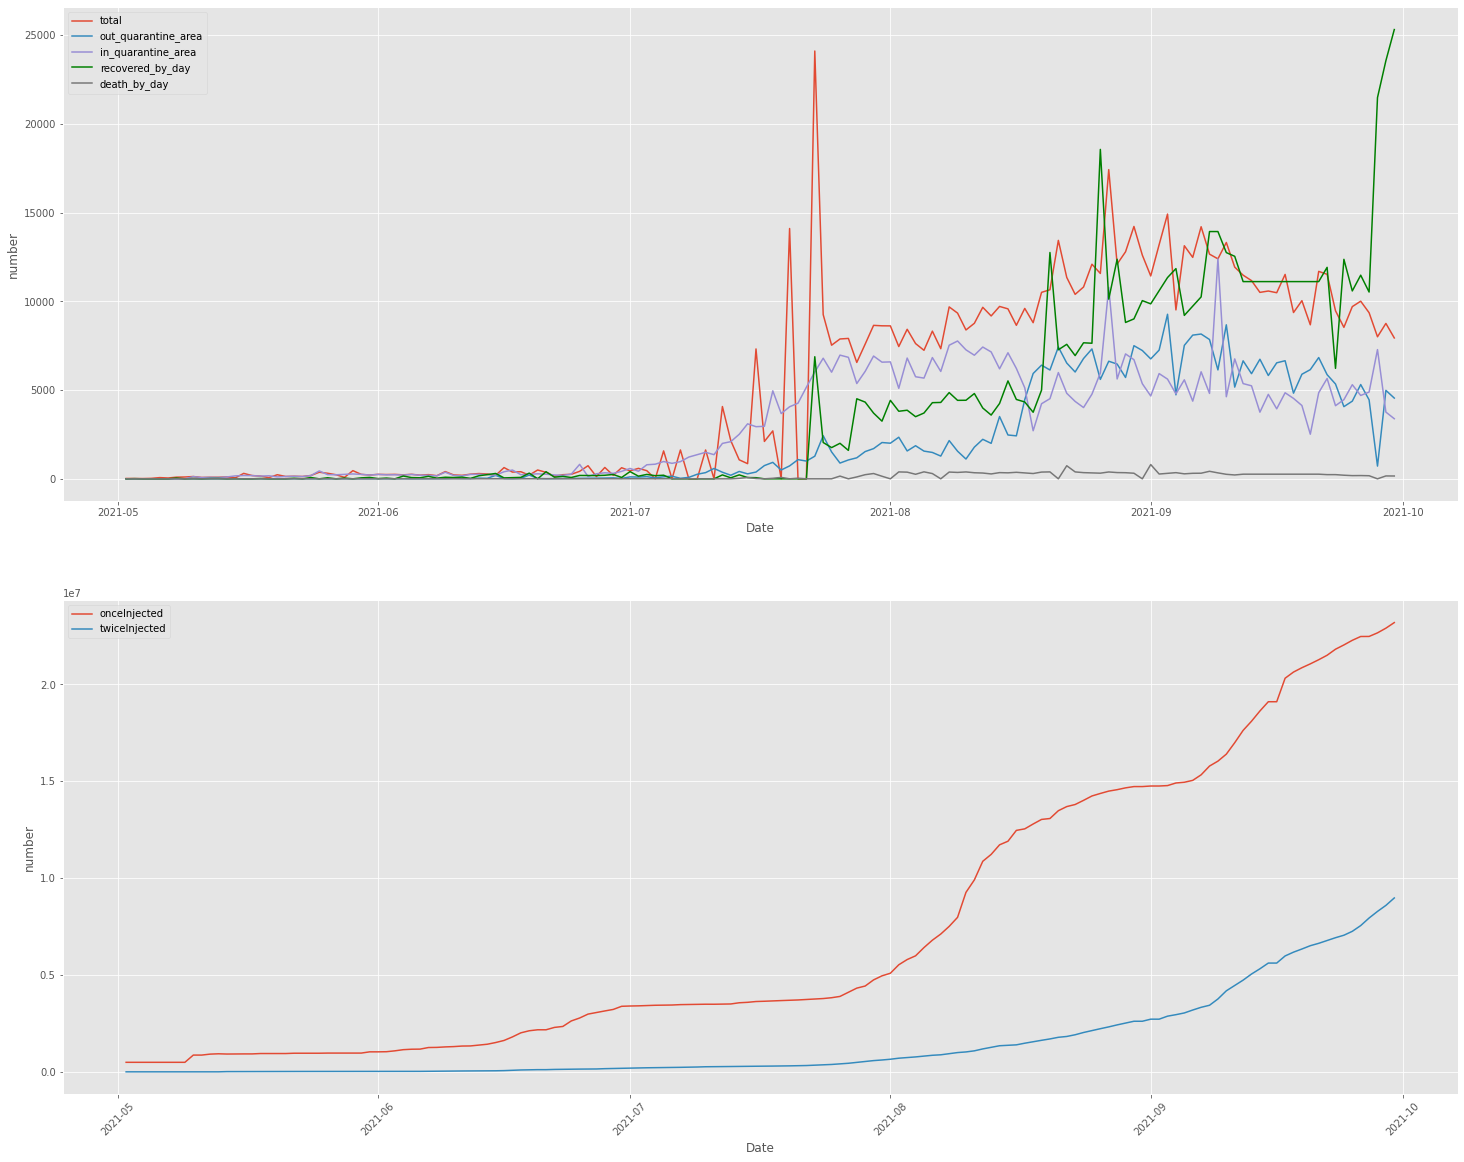

In [56]:
indices2 = (df_nation['Date'] > datetime.datetime(2021, 5, 1)) & (df_nation['Date'] < datetime.datetime(2021, 10, 1))

fig_dims = (25, 20)
fig, (ax,ax2) = plt.subplots(nrows=2,ncols=1,figsize=fig_dims)
ax = sns.lineplot(x='Date', y='total', data=df_nation.loc[indices2], ax = ax, label='total')
ax = sns.lineplot(x='Date', y='out_quarantine_area', data=df_nation.loc[indices2], ax = ax, label='out_quarantine_area')
ax = sns.lineplot(x='Date', y='in_quarantine_area', data=df_nation.loc[indices2], ax = ax, label='in_quarantine_area')
ax = sns.lineplot(x='Date', y='recovered_by_day', data=df_nation.loc[indices2], ax = ax, label='recovered_by_day', color='green')
ax = sns.lineplot(x='Date', y='death_by_day', data=df_nation.loc[indices2], ax = ax, label='death_by_day')
plt.xticks(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel('number')
ax2 = sns.lineplot(x='Date', y='onceInjected', data=df_nation.loc[indices2], ax = ax2, label='onceInjected')
ax2 = sns.lineplot(x='Date', y='twiceInjected', data=df_nation.loc[indices2], ax = ax2, label='twiceInjected')
ax2.legend(loc="upper left")
ax2.set_ylabel('number')
plt.xticks(rotation=45)
plt.show()

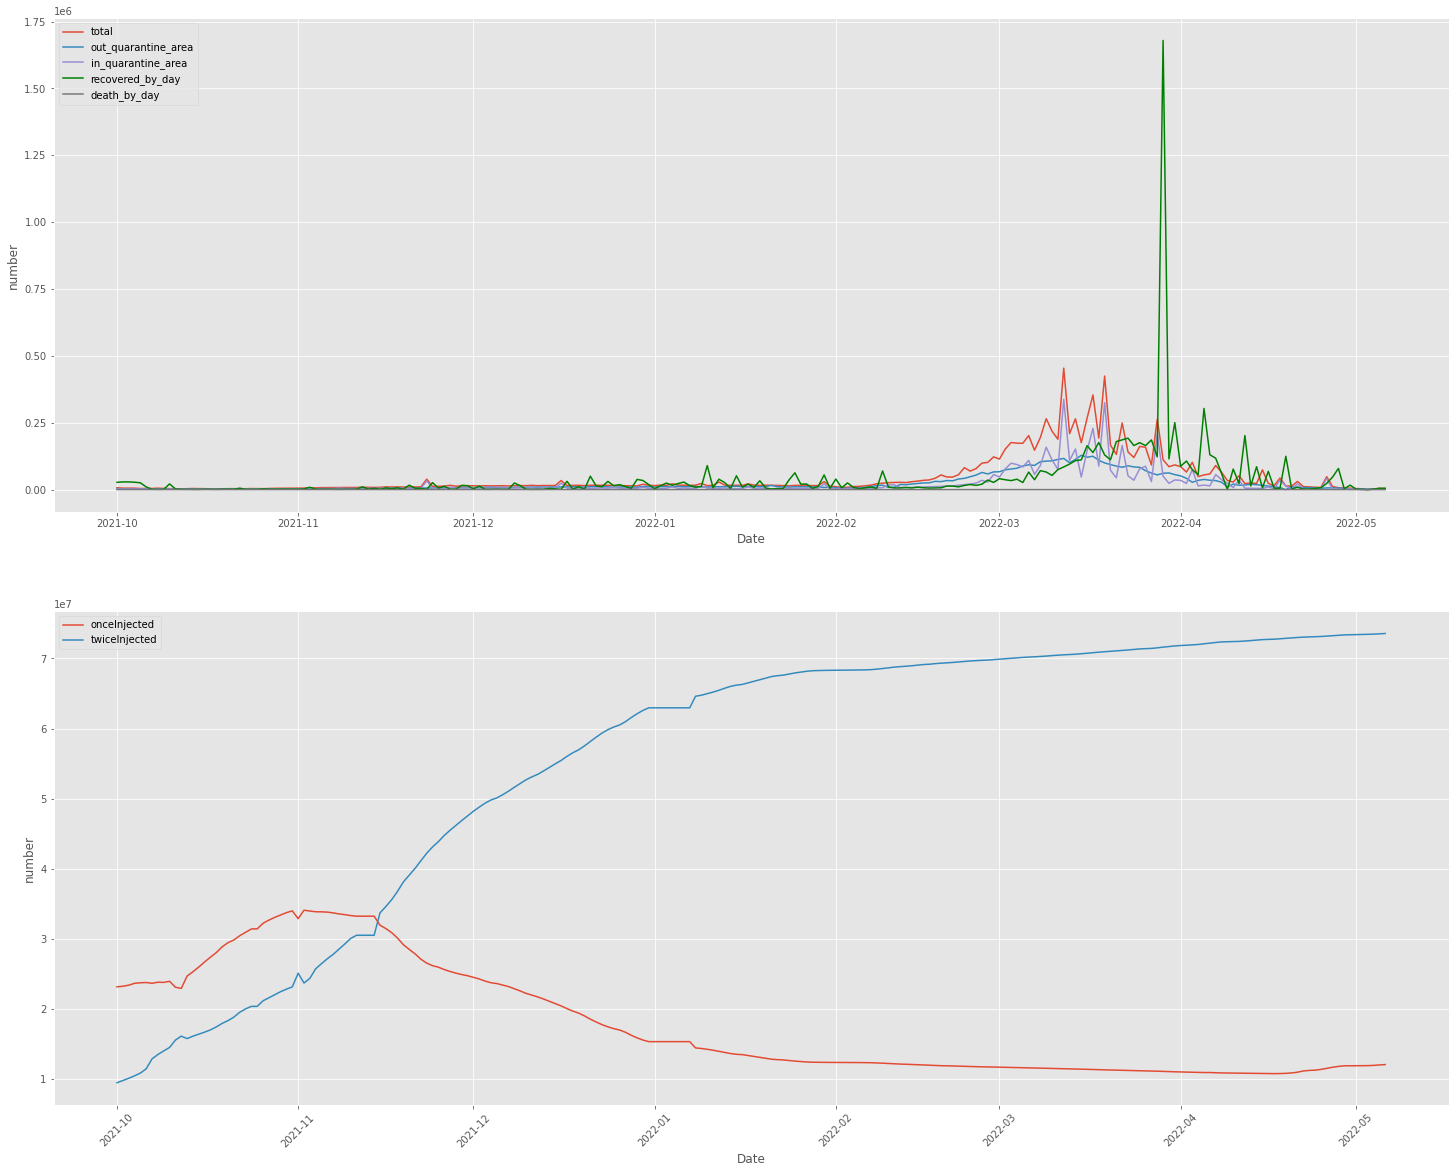

In [57]:
indices3 = (df_nation['Date'] >= datetime.datetime(2021, 10, 1))
fig_dims = (25, 20)
fig, (ax,ax2) = plt.subplots(nrows=2,ncols=1,figsize=fig_dims)
ax = sns.lineplot(x='Date', y='total', data=df_nation.loc[indices3], ax = ax, label='total')
ax = sns.lineplot(x='Date', y='out_quarantine_area', data=df_nation.loc[indices3], ax = ax, label='out_quarantine_area')
ax = sns.lineplot(x='Date', y='in_quarantine_area', data=df_nation.loc[indices3], ax = ax, label='in_quarantine_area')
ax = sns.lineplot(x='Date', y='recovered_by_day', data=df_nation.loc[indices3], ax = ax, label='recovered_by_day', color='green')
ax = sns.lineplot(x='Date', y='death_by_day', data=df_nation.loc[indices3], ax = ax, label='death_by_day')
plt.xticks(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel('number')
ax2 = sns.lineplot(x='Date', y='onceInjected', data=df_nation.loc[indices3], ax = ax2, label='onceInjected')
ax2 = sns.lineplot(x='Date', y='twiceInjected', data=df_nation.loc[indices3], ax = ax2, label='twiceInjected')
ax2.legend(loc="upper left")
ax2.set_ylabel('number')
plt.xticks(rotation=45)
plt.show()

#Visualize for some provinces

In [59]:
df = {}

In [78]:
df['HaNoi'] = pd.read_json('./data/HaNoi', convert_axes=False, orient='columns')
df['BacGiang'] = pd.read_json('./data/BacGiang', convert_axes=False, orient='columns')
df['CanTho'] = pd.read_json('./data/CanTho', convert_axes=False, orient='columns')
df['DaNang'] = pd.read_json('./data/DaNang', convert_axes=False, orient='columns')
df['HaiPhong'] = pd.read_json('./data/HaiPhong', convert_axes=False, orient='columns')
df['NgheAn'] = pd.read_json('./data/NgheAn', convert_axes=False, orient='columns')
df['TPHCM'] = pd.read_json('./data/TPHCM', convert_axes=False, orient='columns')
df['VinhPhuc'] = pd.read_json('./data/VinhPhuc', convert_axes=False, orient='columns')

In [79]:
df['HaNoi'].head()

,case_by_day,death_by_day,recovered_by_day
18/3/2020,0,0,0
19/3/2020,0,0,0
20/3/2020,0,0,0
21/3/2020,0,0,0
22/3/2020,0,0,0


In [80]:
for key,_df in df.items():
    _df['Date'] = pd.to_datetime(_df.index, format = '%d/%m/%Y')
    indices = _df[_df['Date'] < datetime.datetime(2020, 12, 1)].index
    _df.drop(indices, inplace=True)

In [81]:
df['HaNoi'].head()

,case_by_day,death_by_day,recovered_by_day,Date
1/12/2020,0,0,0,2020-12-01
2/12/2020,1,0,0,2020-12-02
3/12/2020,0,0,0,2020-12-03
4/12/2020,0,0,0,2020-12-04
5/12/2020,0,0,0,2020-12-05


In [112]:
df['HaNoi'].tail(10)

,case_by_day,death_by_day,recovered_by_day,Date
28/4/2022,913,0,0,2022-04-28
29/4/2022,843,0,0,2022-04-29
30/4/2022,837,0,0,2022-04-30
1/5/2022,795,0,0,2022-05-01
2/5/2022,761,0,0,2022-05-02
3/5/2022,761,0,0,2022-05-03
4/5/2022,705,0,0,2022-05-04
5/5/2022,684,0,0,2022-05-05
6/5/2022,673,0,0,2022-05-06
7/5/2022,0,0,0,2022-05-07


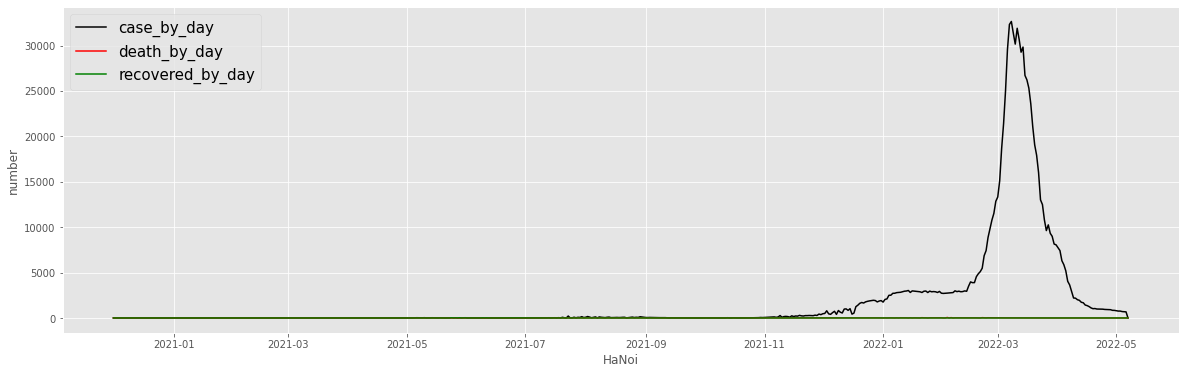

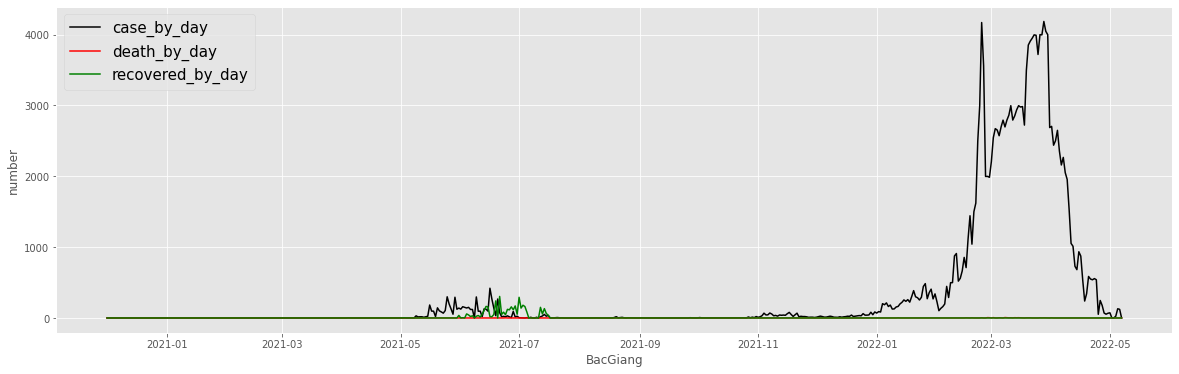

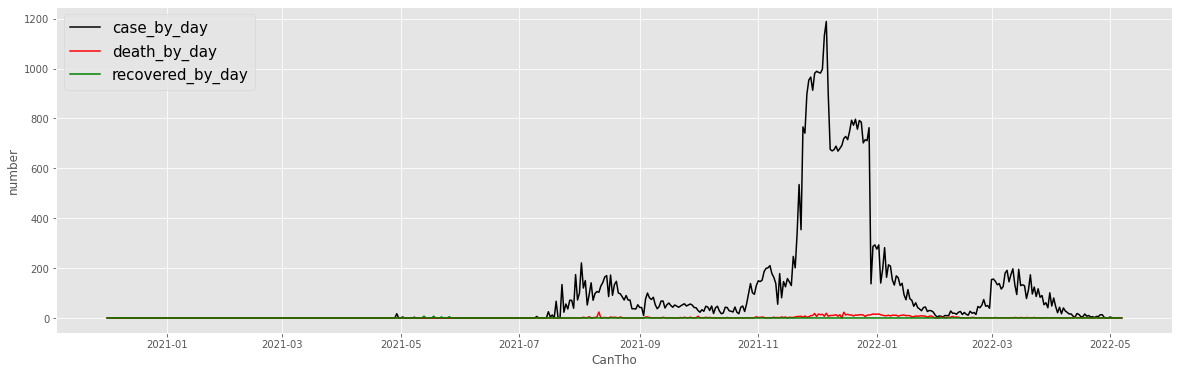

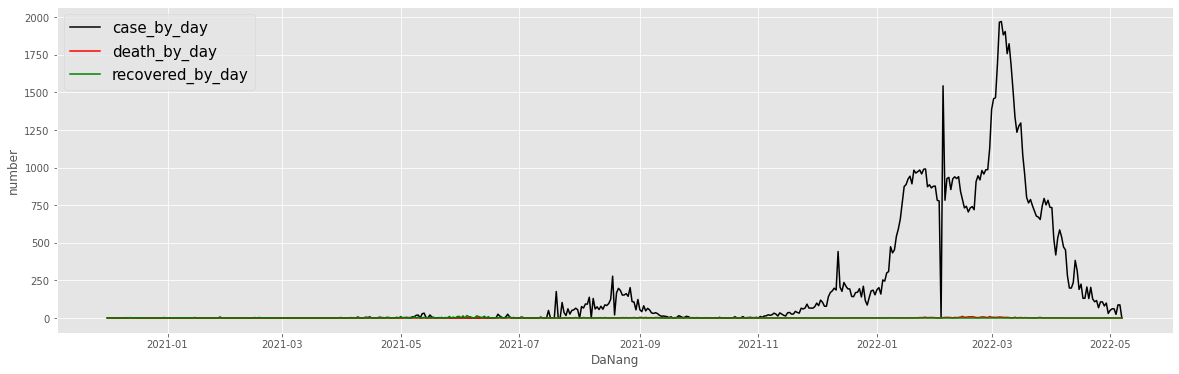

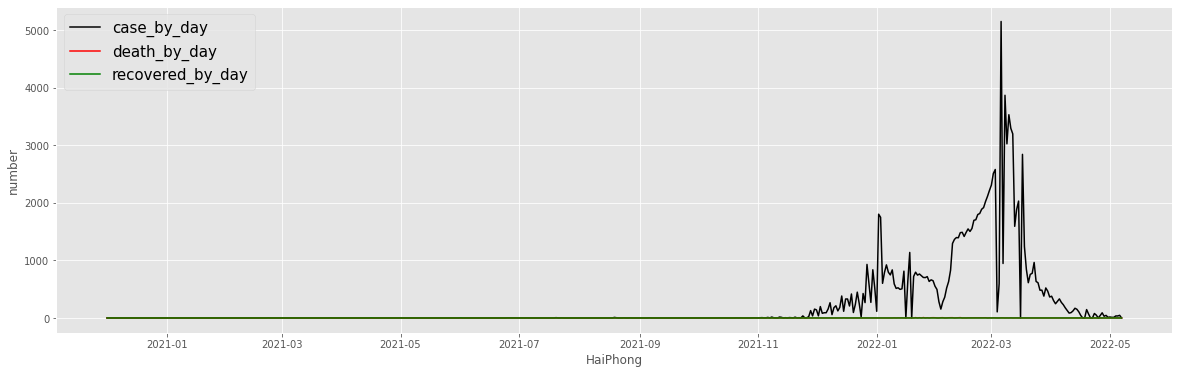

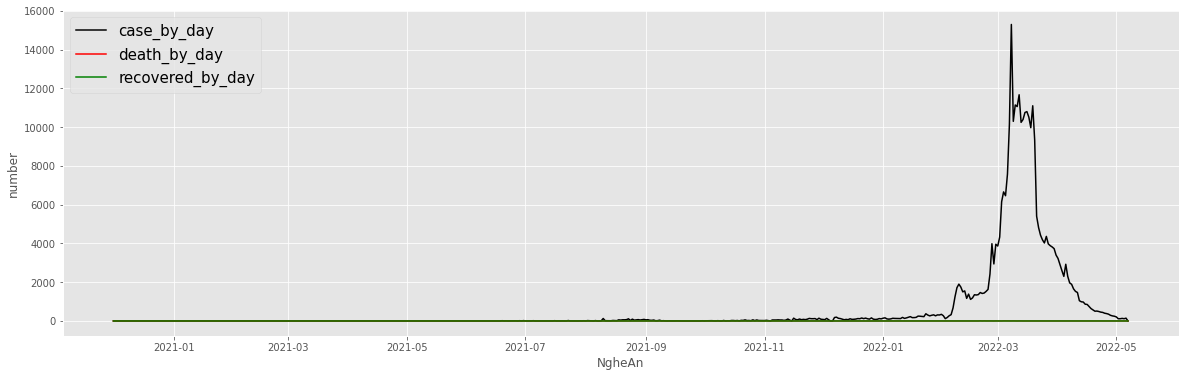

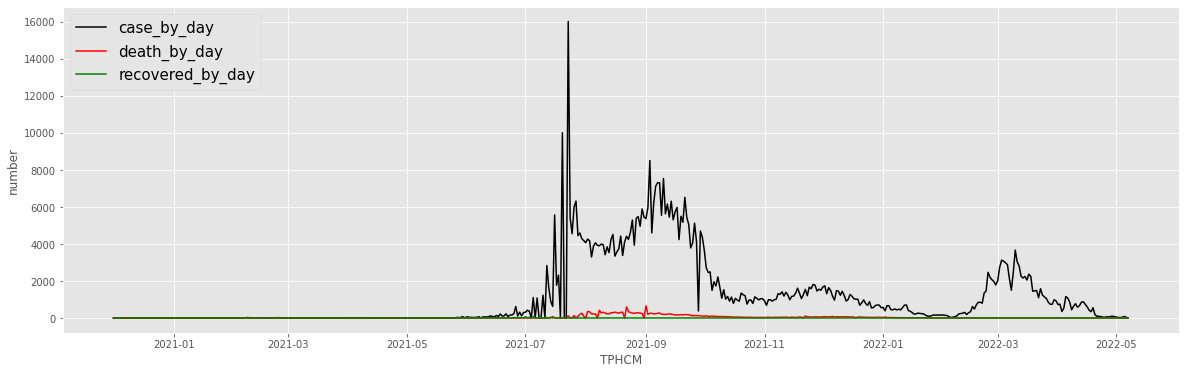

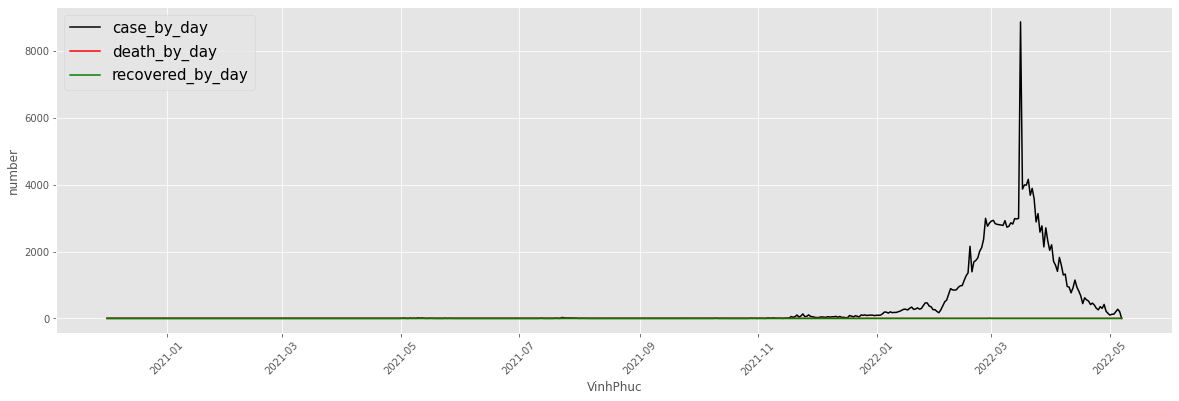

In [117]:
for key, _df in df.items():
    fig_dims = (20, 6)
    fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=fig_dims)
    
    indices1 = _df['Date'] < datetime.datetime(2021, 5, 1)
    ax1 = sns.lineplot(x='Date',y='case_by_day',data=_df, ax = ax1,color='black', label='case_by_day')
    ax1 = sns.lineplot(x='Date',y='death_by_day',data=_df, ax = ax1,color='r', label='death_by_day')
    ax1 = sns.lineplot(x='Date',y='recovered_by_day',data=_df, ax = ax1,color='g', label='recovered_by_day')
    ax1.set_ylabel('number')
    ax1.set_xlabel(key)
    ax1.legend(loc="upper left", prop={'size': 15})
plt.xticks(rotation=45)
plt.show()

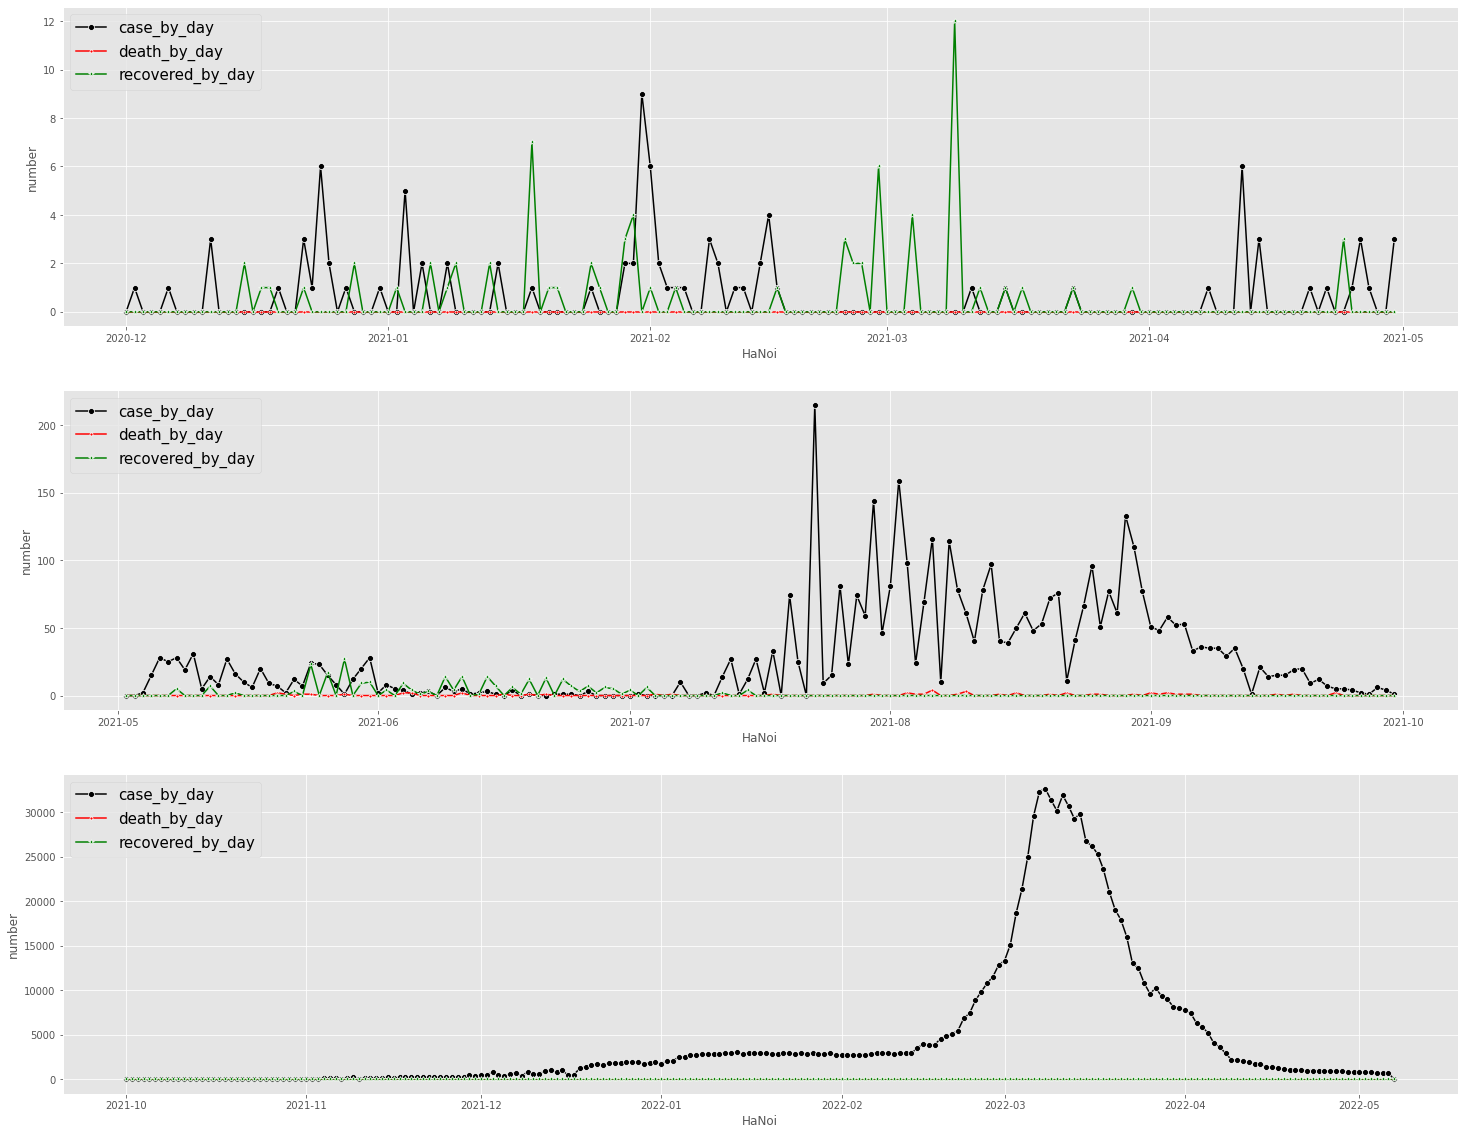

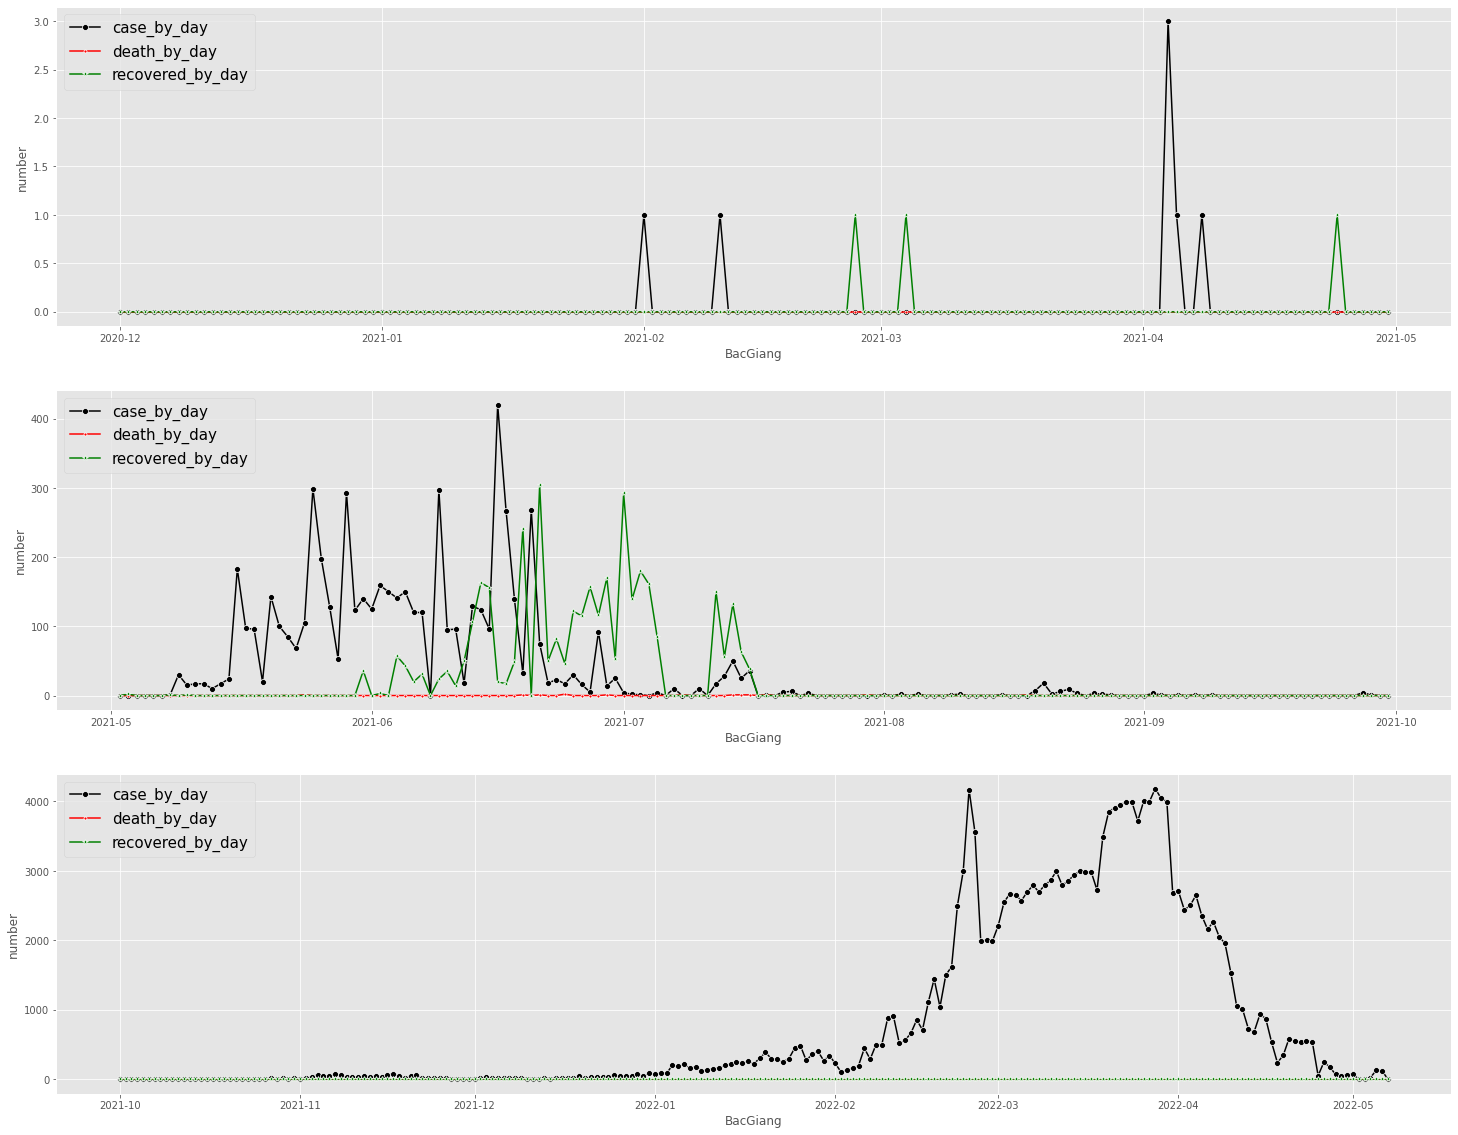

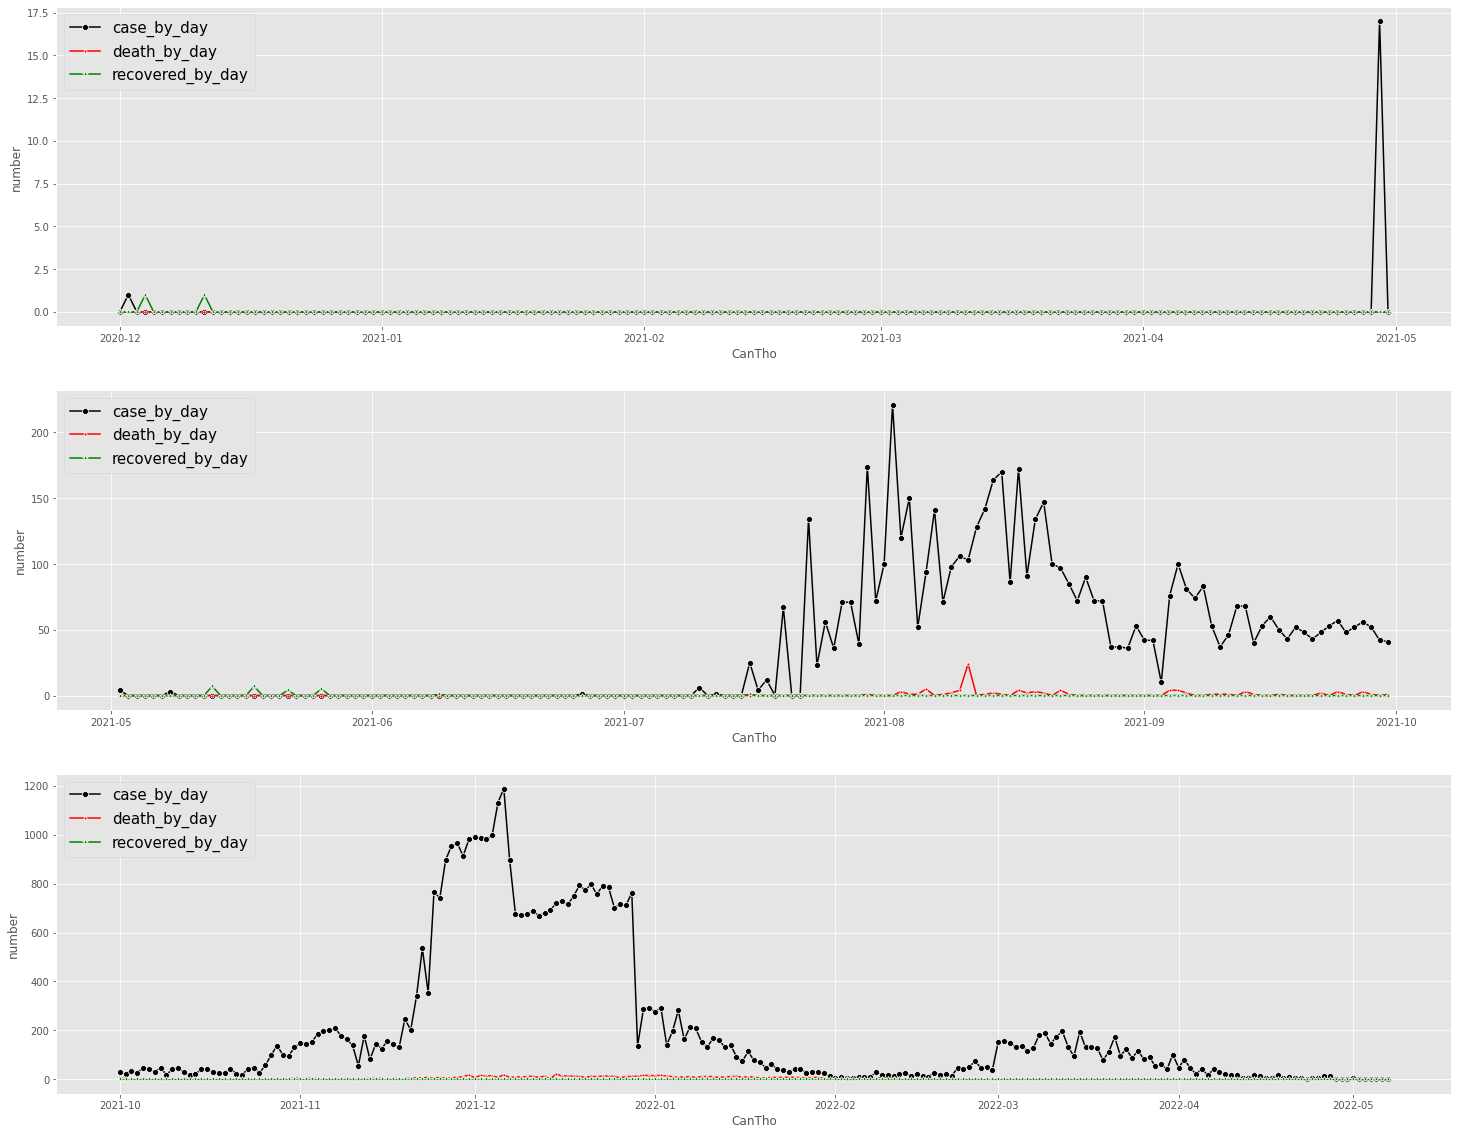

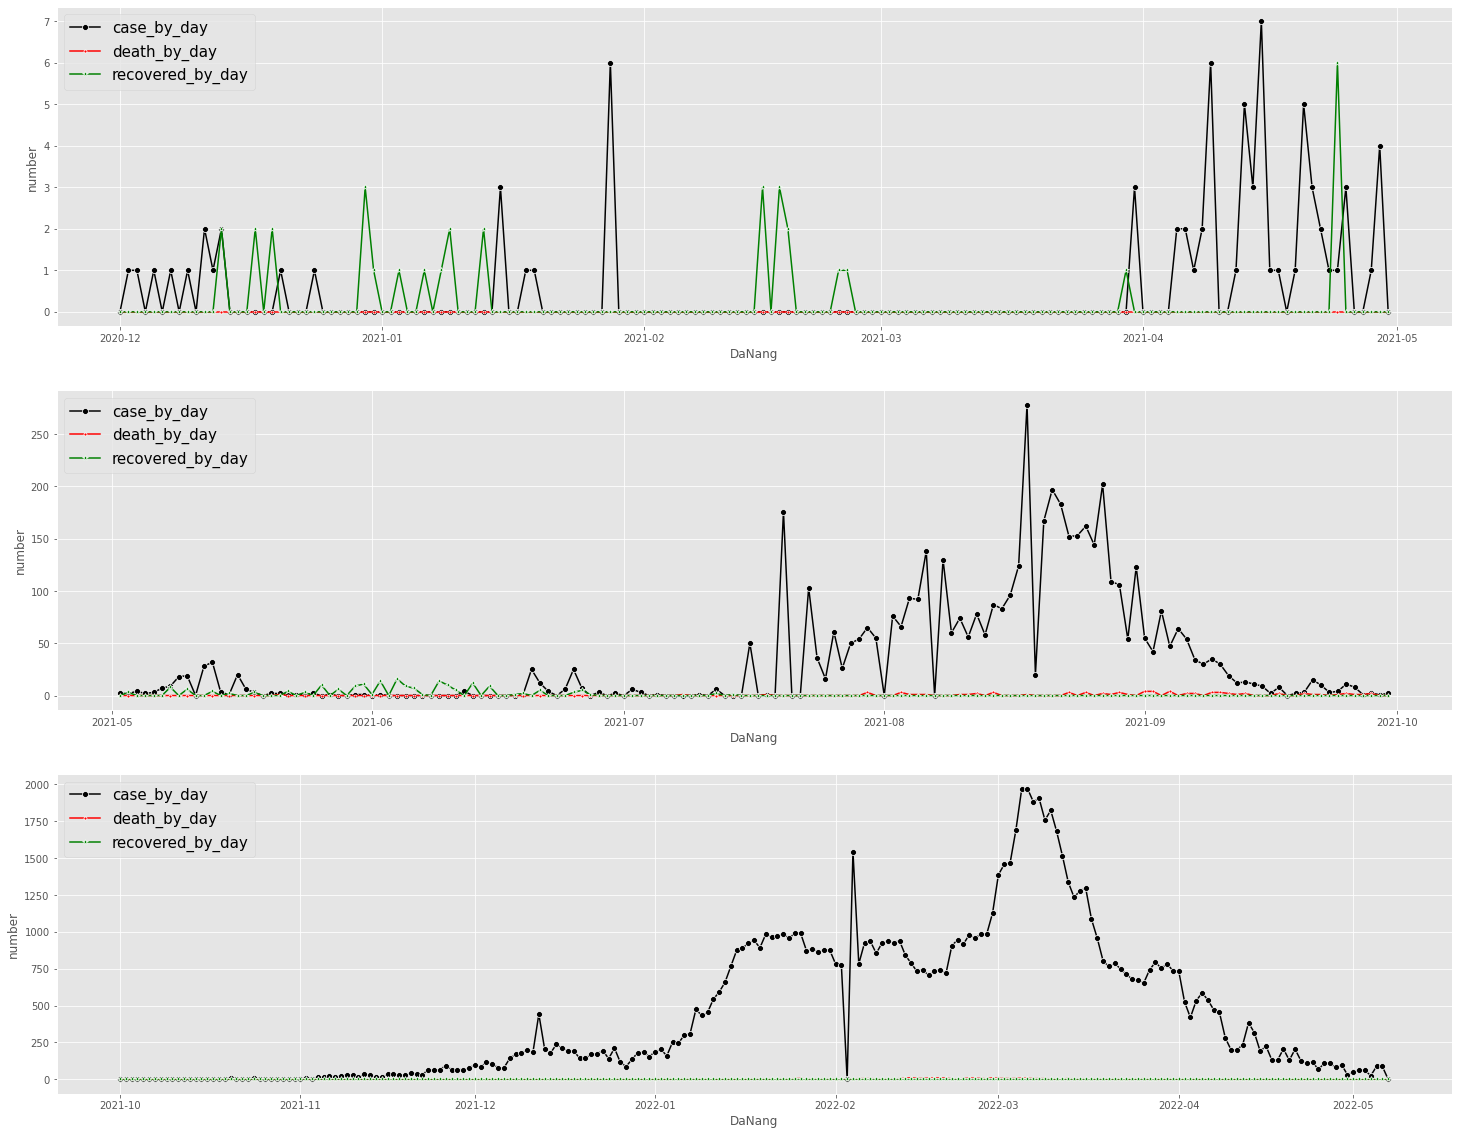

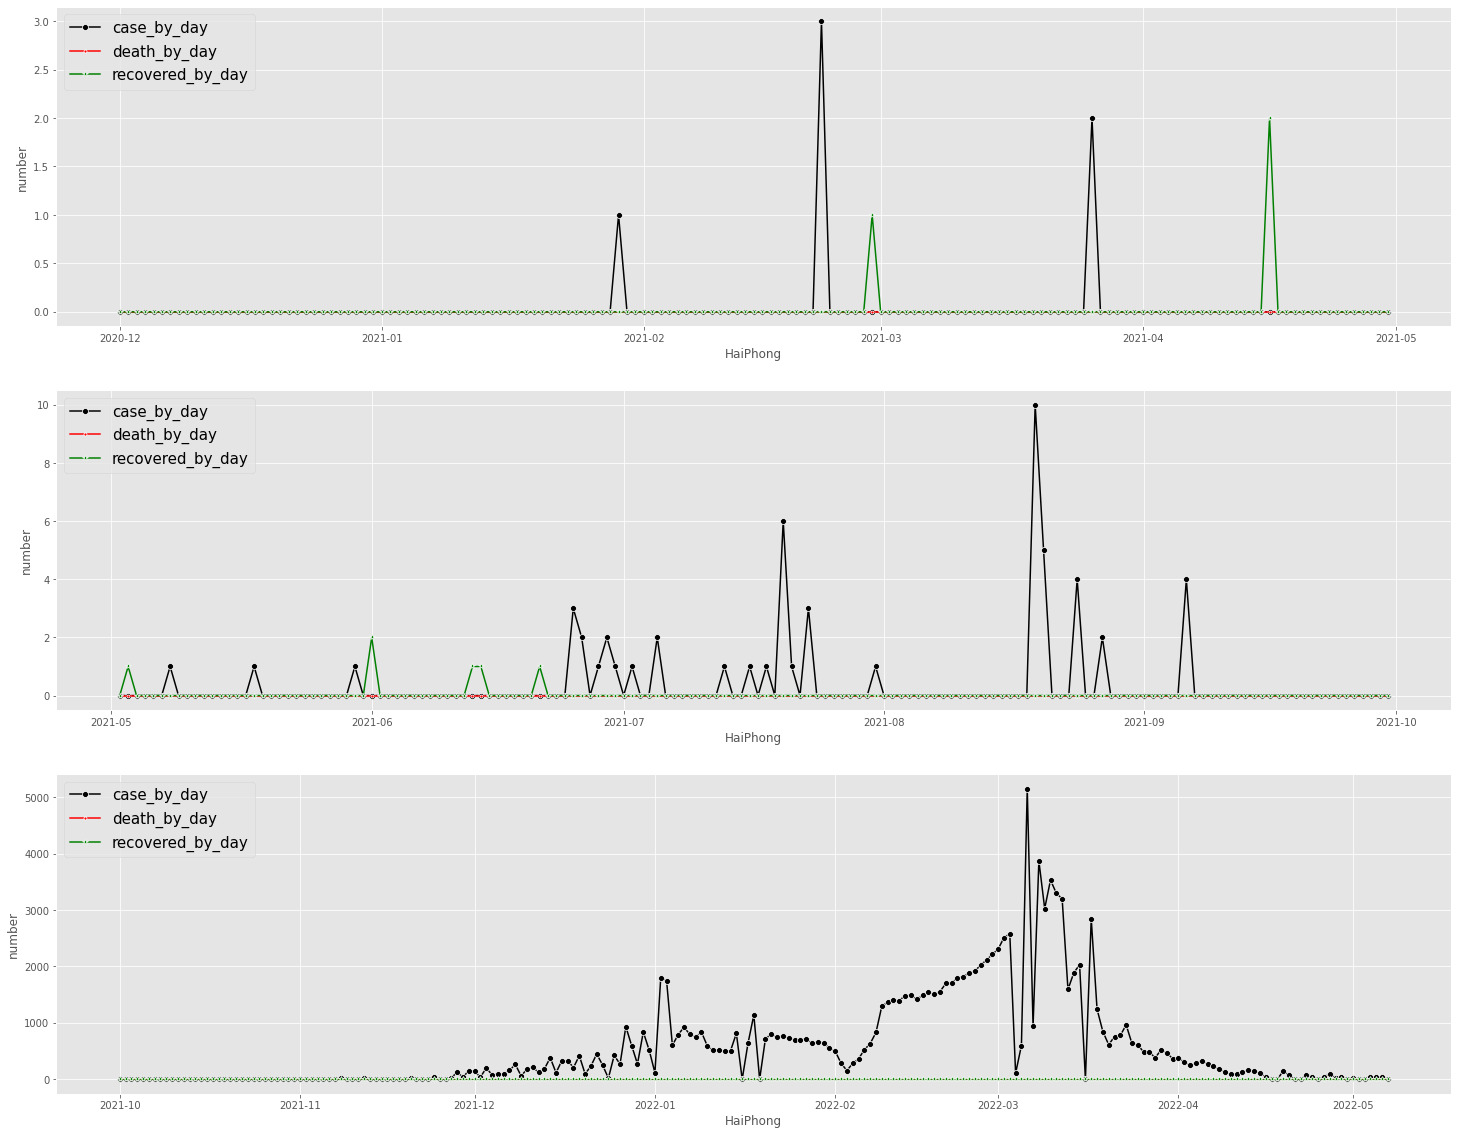

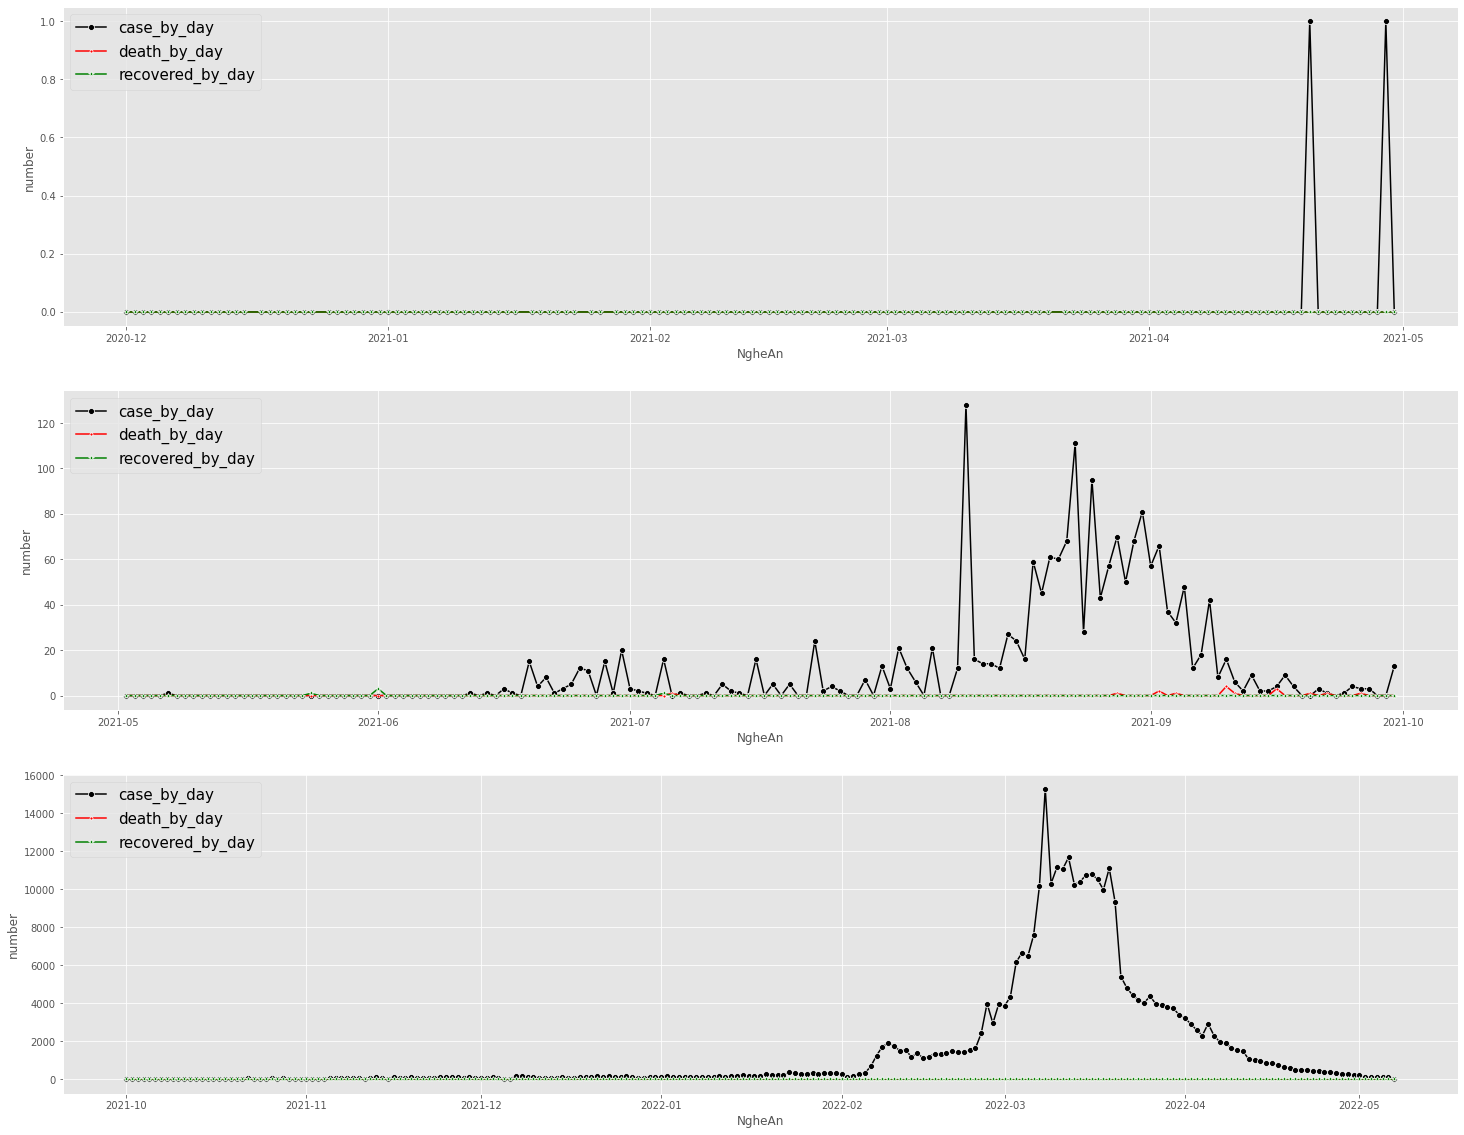

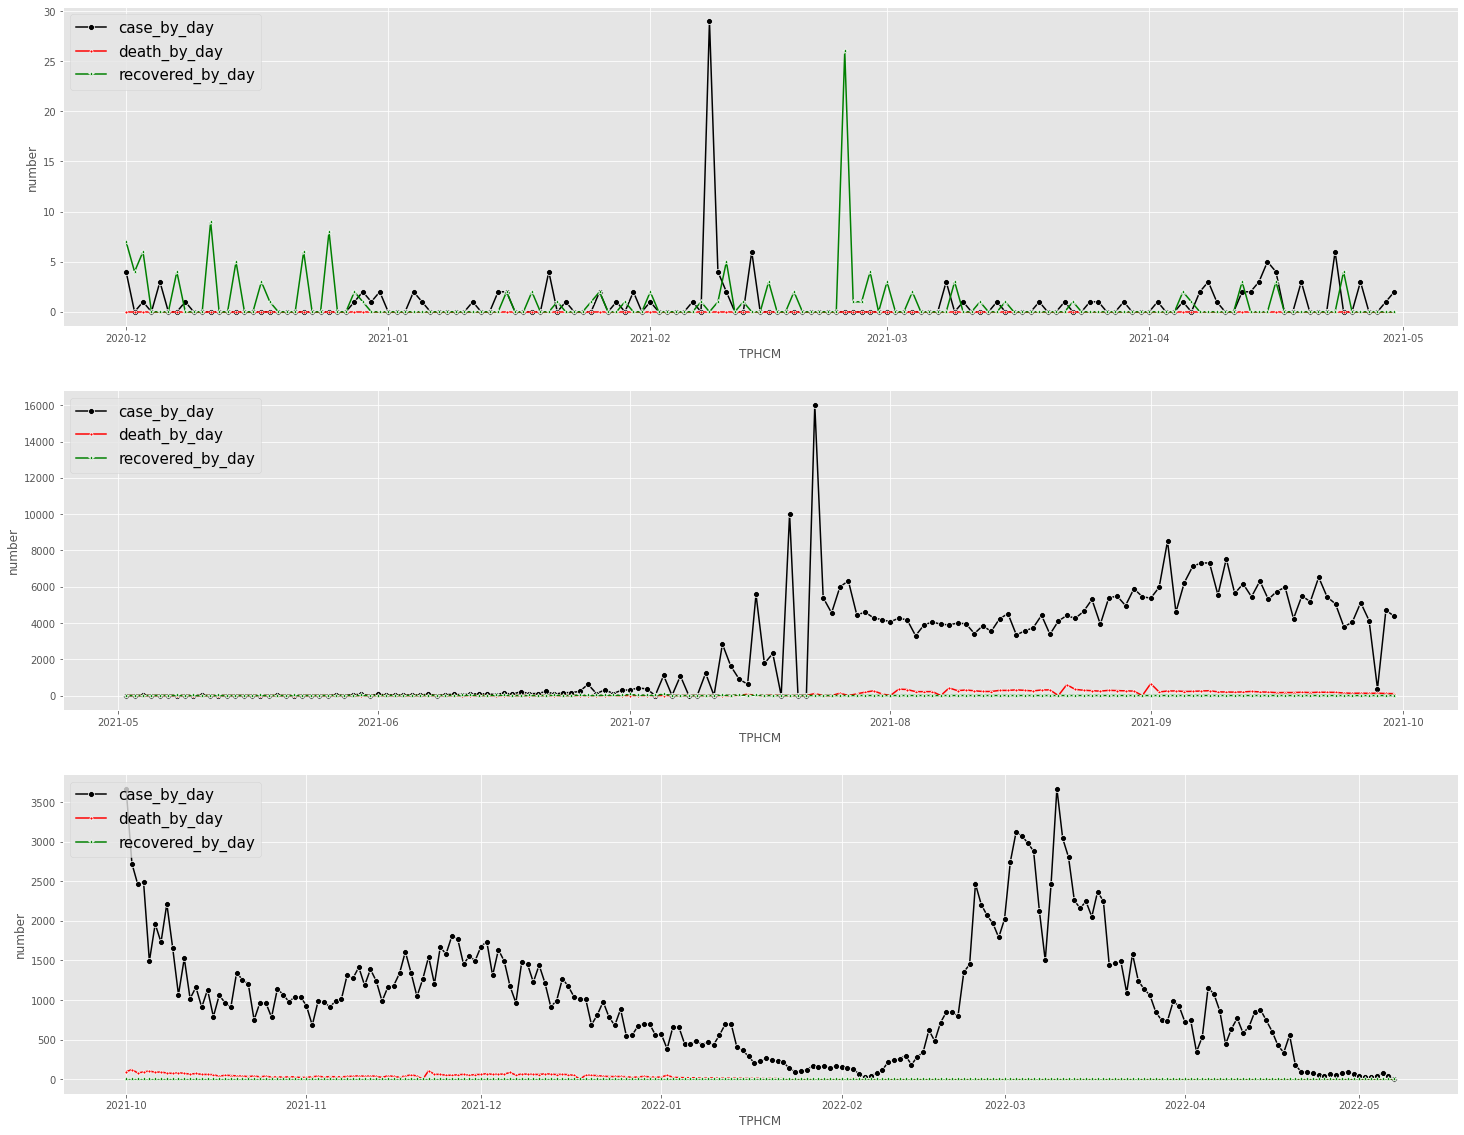

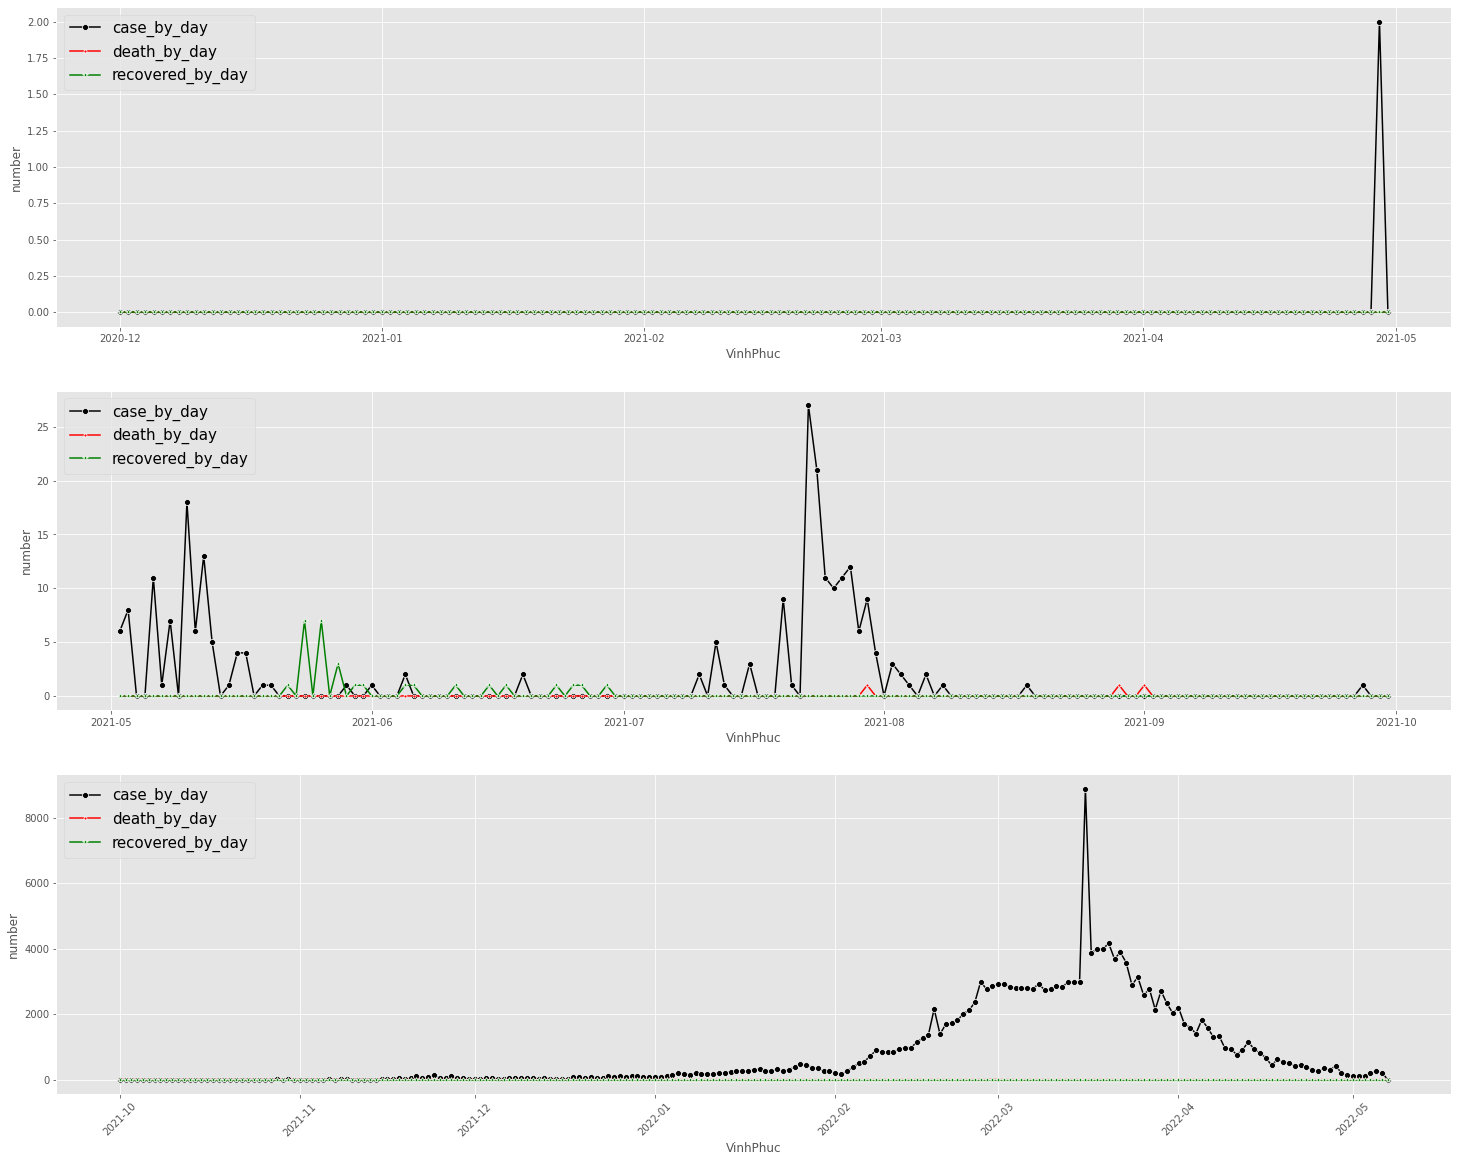

In [109]:
for key, _df in df.items():
    fig_dims = (25, 20)
    fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1,figsize=fig_dims)
    
    indices1 = _df['Date'] < datetime.datetime(2021, 5, 1)
    ax1 = sns.lineplot(x='Date',y='case_by_day',data=_df[indices1], ax = ax1, marker='o',color='black', label='case_by_day')
    ax1 = sns.lineplot(x='Date',y='death_by_day',data=_df[indices1], ax = ax1, marker='.',color='r', label='death_by_day')
    ax1 = sns.lineplot(x='Date',y='recovered_by_day',data=_df[indices1], ax = ax1, marker='*',color='g', label='recovered_by_day')
    ax1.set_ylabel('number')
    ax1.set_xlabel(key)
    ax1.legend(loc="upper left", prop={'size': 15})
    
    indices2 = (_df['Date'] > datetime.datetime(2021, 5, 1)) & (_df['Date'] < datetime.datetime(2021, 10, 1))
    ax2 = sns.lineplot(x='Date',y='case_by_day',data=_df[indices2], ax = ax2, marker='o',color='black', label='case_by_day')
    ax2 = sns.lineplot(x='Date',y='death_by_day',data=_df[indices2], ax = ax2, marker='.',color='r', label='death_by_day')
    ax2 = sns.lineplot(x='Date',y='recovered_by_day',data=_df[indices2], ax = ax2, marker='*',color='g', label='recovered_by_day')
    ax2.set_ylabel('number')
    ax2.legend(loc="upper left", prop={'size': 15})
    ax2.set_xlabel(key)
    
    indices3 = (_df['Date'] >= datetime.datetime(2021, 10, 1))
    ax3 = sns.lineplot(x='Date',y='case_by_day',data=_df[indices3], ax = ax3, marker='o',color='black', label='case_by_day')
    ax3 = sns.lineplot(x='Date',y='death_by_day',data=_df[indices3], ax = ax3, marker='.',color='r', label='death_by_day')
    ax3 = sns.lineplot(x='Date',y='recovered_by_day',data=_df[indices3], ax = ax3, marker='*',color='g', label='recovered_by_day')
    ax3.set_ylabel('number')
    ax3.legend(loc="upper left", prop={'size': 15})
    ax3.set_xlabel(key)
plt.xticks(rotation=45)
plt.show()